## Exercise 8.8 

- This code computes and visualizes all the GPT-2 small attention patterns for some given input text, as shown in Figure 8.1
- Experimenting with other inputs, can you find other examples of patterns like our "American flag" modifier?
- The final cell has a "zoomed in view" for a given layer that includes the tokens and attention patterns

In [1]:
import numpy as np
import torch as t
import transformer_lens
import matplotlib.pyplot as plt

In [2]:
device = "cuda"
model = transformer_lens.HookedTransformer.from_pretrained("gpt2-small")

Loaded pretrained model gpt2-small into HookedTransformer


In [3]:
# Change input text here
reference_text = "The American flag is red, white, and"

In [4]:
tokens = model.to_tokens(reference_text).to(device)
logits, cache = model.run_with_cache(tokens)
logits.shape

torch.Size([1, 10, 50257])

In [5]:
all_ones = t.ones(tokens.shape[1] - 1, tokens.shape[1] - 1)
mask = t.triu(all_ones, diagonal=1).bool().numpy()

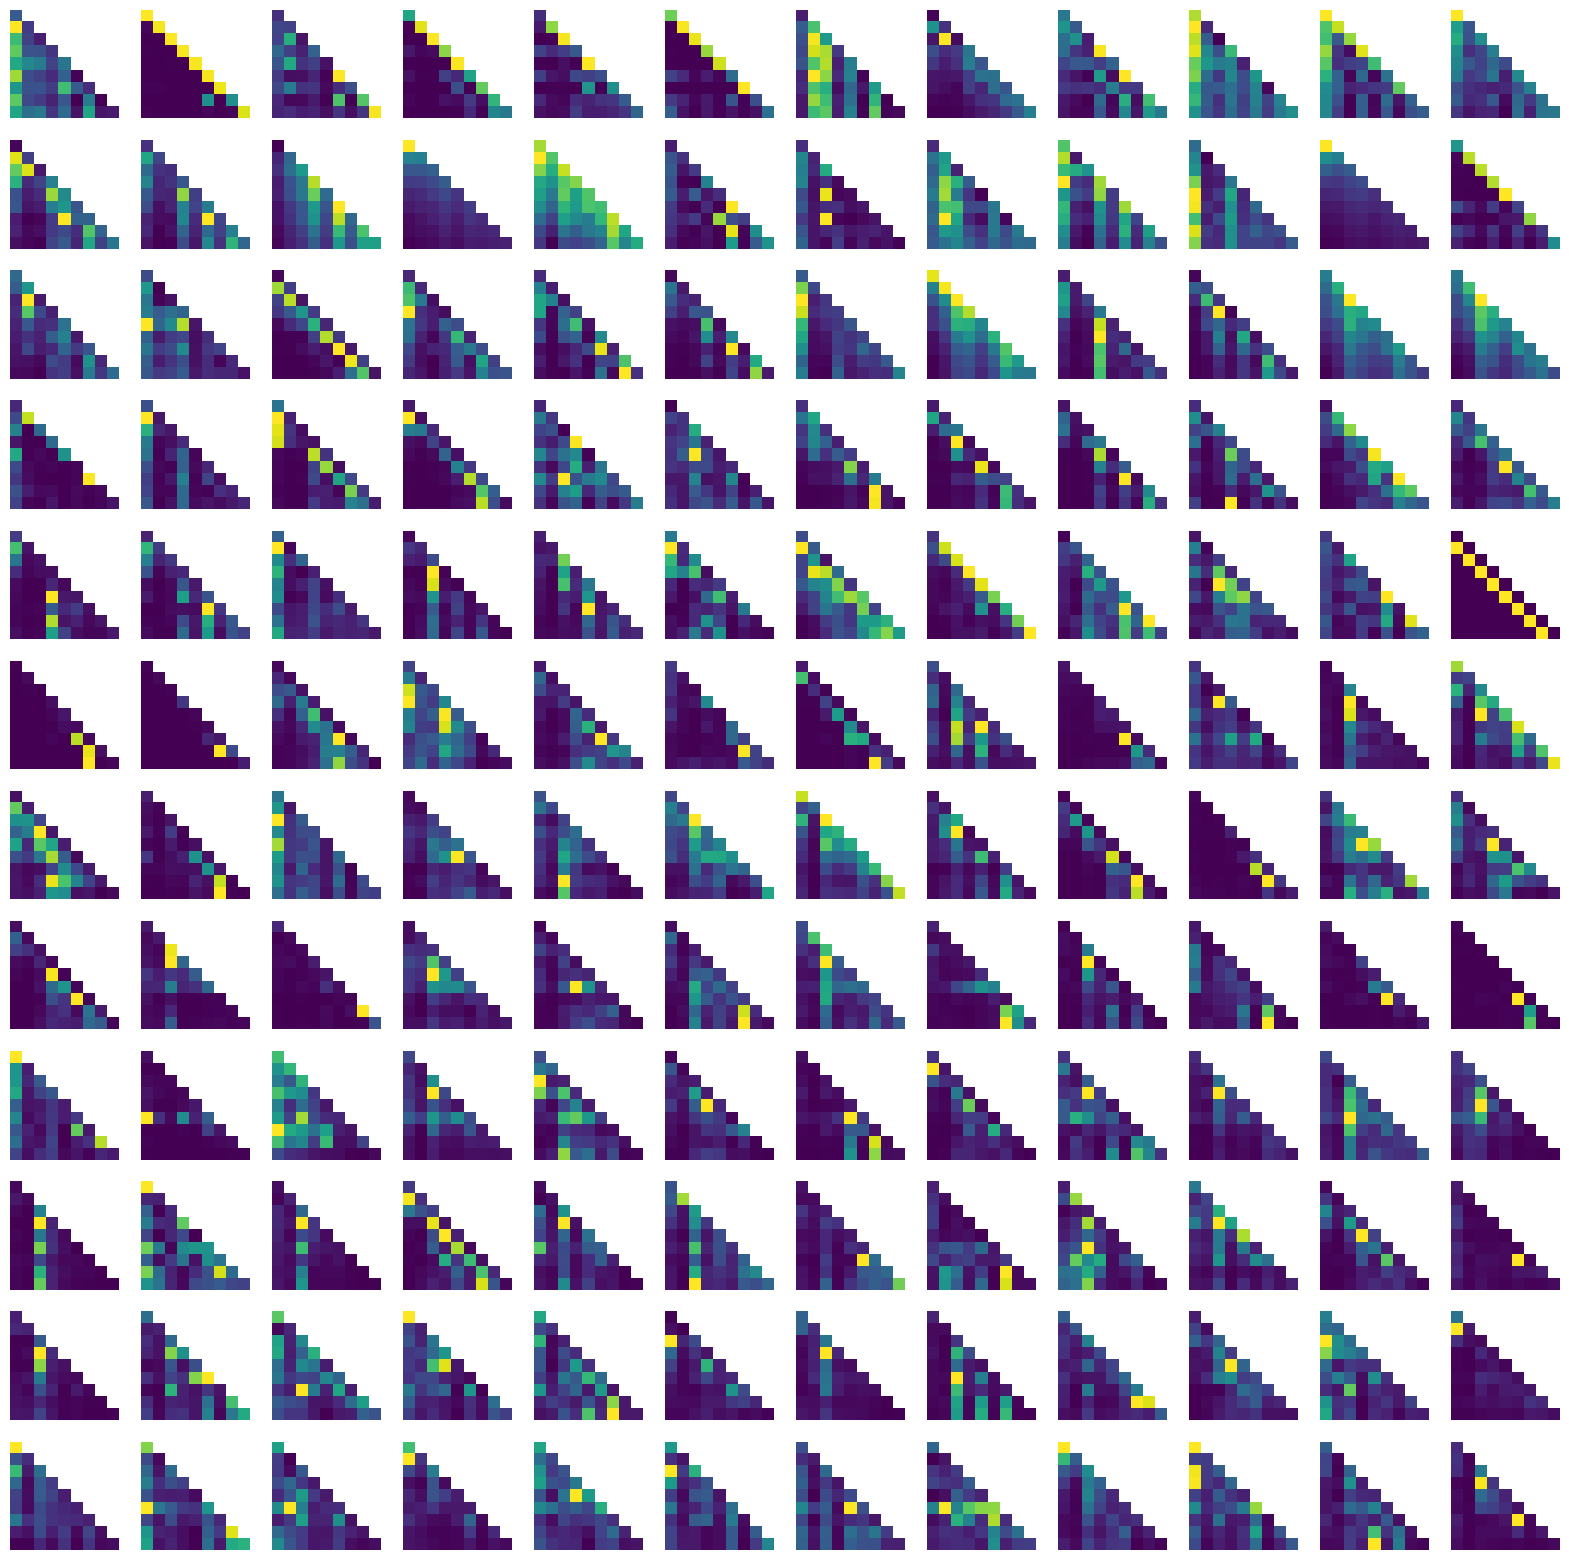

In [6]:
token_string_list = model.to_str_tokens(tokens)[1:]
fig = plt.figure(0, (20, 20))

plt.clf()
for layer in range(12):
    attn_pattern = cache["blocks." + str(layer) + ".attn.hook_pattern"]
    for i in range(12):
        ax = fig.add_subplot(12, 12, 12 * (layer) + i + 1)
        a = (
            attn_pattern[0, i].detach().cpu().numpy()[1:, 1:]
        )  # Ignoring beginning of sentence token
        a_masked = np.ma.masked_array(a, mask)
        plt.imshow(a_masked)
        plt.axis("off")

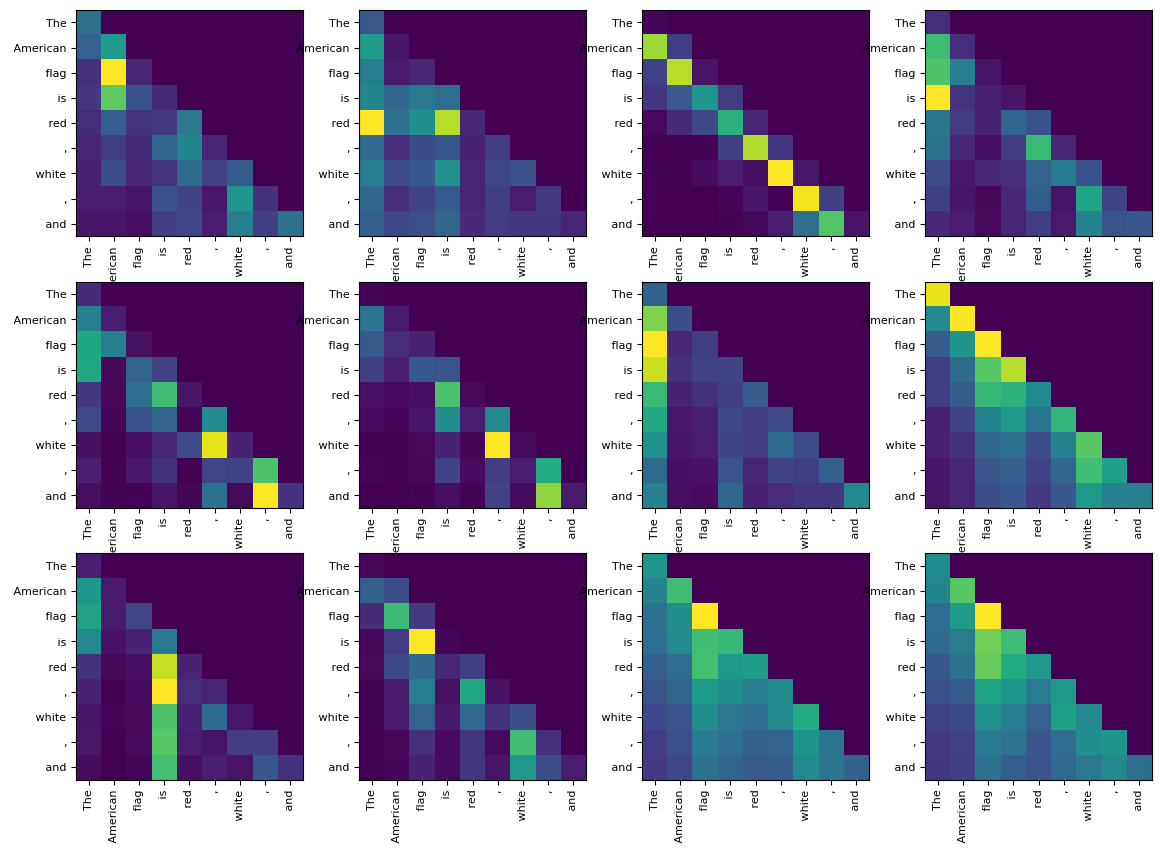

In [7]:
layer = 2
attn_pattern = cache["blocks." + str(layer) + ".attn.hook_pattern"]
fig = plt.figure(0, (14, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1)
    plt.imshow(attn_pattern[0, i, 1:, 1:].detach().cpu().numpy())
    ax.set_xticks(np.arange(len(token_string_list)))
    ax.set_xticklabels(token_string_list)
    plt.xticks(rotation=90, fontsize=8)
    ax.set_yticks(np.arange(len(token_string_list)))
    ax.set_yticklabels(token_string_list)
    plt.yticks(fontsize=8)
plt.show()